In [1]:
import jax.numpy as jnp

In [2]:
import numpy as np


In [3]:
from jax import grad, jit, vmap, pmap

from jax import lax

from jax import make_jaxpr
from jax import random
from jax import device_put

import matplotlib.pyplot as plt


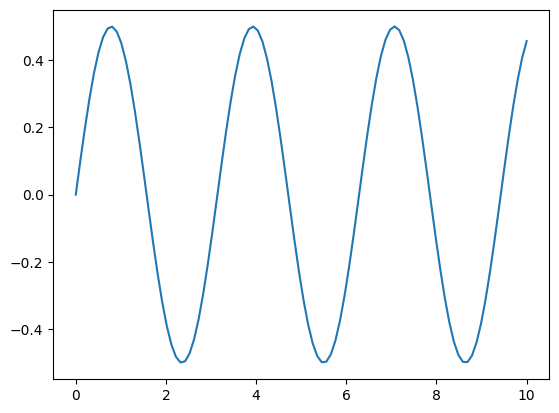

In [14]:
# jax syntax is similar to numpy. usually numpy we will impoort as np, jax we will
#import as jnp, remianing its all the same.
x_np = np.linspace(0,10,100)
y_np = np.sin(x_np) * np.cos(x_np)

plt.plot(x_np , y_np)

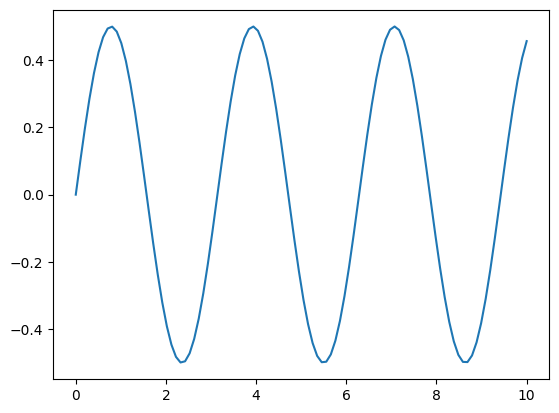

In [15]:
x_jnp= jnp.linspace(0,10,100)
y_jnp = jnp.sin(x_jnp) * jnp.cos(x_jnp)

plt.plot(x_jnp , y_jnp)

In [17]:
# unlike, numpy arrays JAX arrays are immutable. Meaning once initialised the value in the 
#array can't be changed

size = 10
index = 0
value = 23

x = np.arange(size)
print(x)
x[index] = value
print(x)

[0 1 2 3 4 5 6 7 8 9]
[23  1  2  3  4  5  6  7  8  9]


In [19]:
size =10 
index =0 
value =23

x= jnp.arange(size)
print(x)


[0 1 2 3 4 5 6 7 8 9]


In [20]:
# It doesnt work. it gives error.


x[index]=value
print(x)

TypeError: '<class 'jaxlib.xla_extension.ArrayImpl'>' object does not support item assignment. JAX arrays are immutable. Instead of ``x[idx] = y``, use ``x = x.at[idx].set(y)`` or another .at[] method: https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.ndarray.at.html

In [24]:
# There is a solution. the solution is to create a new array with same values 
# except the particular index for which it is updated

y= x.at[index].set(value)
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[23  1  2  3  4  5  6  7  8  9]


In [31]:
# random number generation in jax 
# random.normal uses normal(gaussian distribution) mean=0 std deviation=1
# there are others too like
# jax.random.normal: Generates samples from a normal (Gaussian) distribution.
# jax.random.uniform: Generates samples from a uniform distribution.
# jax.random.randint: Generates random integers.
# jax.random.permutation: Generates a random permutation of an array.
seed =0
key = random.PRNGKey(seed)

x= random.normal(key, (10,))
x_1= random.normal(key, (10,2,2))
print(type(x),x)

<class 'jaxlib.xla_extension.ArrayImpl'> [-0.3721109   0.26423115 -0.18252768 -0.7368197  -0.44030377 -0.1521442
 -0.67135346 -0.5908641   0.73168886  0.5673026 ]


In [38]:
# JAX is AI accelerator agnostic which means the same code runs every where irrespective of framework

size =3000

x_jnp = random.normal(key, (size,size), dtype=jnp.float32)
x_np = random.normal(key,(size,size), dtype=np.float32)

%timeit jnp.dot(x_jnp, x_jnp.T).block_until_ready()
%timeit np.dot(x_np, x_np.T)
%timeit jnp.dot(x_np,x_np.T).block_until_ready()

x_np_device = device_put(x_np)

%timeit jnp.dot(x_np_device, x_np_device.T).block_until_ready()


134 ms ± 3.51 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
134 ms ± 1.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
129 ms ± 1.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
131 ms ± 417 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
import jax

device=jax.devices()

device

[CpuDevice(id=0)]

In [5]:
def visualize_fn(fn, l=-10, r=10, n=1000):
    x=jnp.linspace(l,r, n)
    y=fn(x)
    plt.plot(x,y)
    plt.show()

seed=0
key = random.PRNGKey(seed)

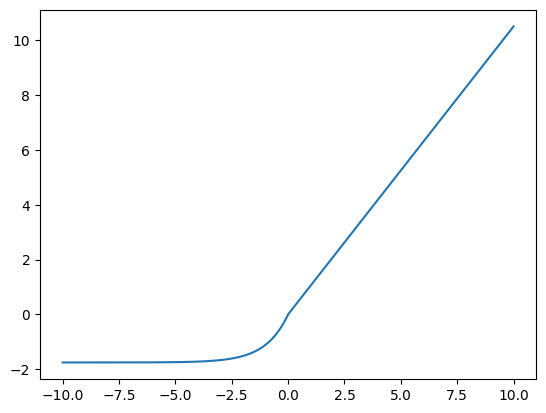

non-jit version:
2.69 ms ± 128 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
jit version :
507 µs ± 20.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [12]:
def selu(x, alpha=1.67, lmbda=1.05):
    return lmbda * jnp.where(x>0, x, alpha* jnp.exp(x) - alpha)

selu_jit = jit(selu)

visualize_fn(selu)

data= random.normal(key, (1000000,))

print('non-jit version:')
%timeit selu(data).block_until_ready()

print('jit version :')

%timeit selu_jit(data).block_until_ready()

In [ ]:
# grad() does automatic differentiation using XLA hence faster than all normal methods
# In JAX, grad() is a function that provides automatic differentiation capabilities. Automatic differentiation is a technique that computes derivatives numerically using the 
# computational graph of the function being differentiated. It is different from the other methods of differentiation you mentioned:

# Manual Differentiation: This involves deriving the analytical derivatives of a function by hand, using calculus rules. It can be tedious and error-prone for complex functions.
# Symbolic Differentiation: In this approach, the function is represented as an expression tree, and differentiation rules are applied to the tree to obtain a new expression tree 
# representing the derivative. This is commonly used in computer algebra systems.
# Numeric Differentiation: This involves approximating the derivative of a function using finite differences. It can be computationally expensive and less accurate, especially for
# higher-order derivatives.
# Automatic Differentiation: This is the approach used by JAX's grad() function. It computes exact derivatives by tracking the computational graph of the function being differentiated,
# and applying the chain rule of calculus to propagate derivatives through the graph. This is more efficient and accurate than numeric differentiation, and more convenient than manual or
# symbolic differentiation for complex functions.

In [28]:
# playing with lambda function
from jax import jacfwd, jacrev
func = lambda x,y,z: x**2 + 2*x +y + z

dfdx = grad(func)
print(dfdx(2.,3.,4.))
i= jacfwd(func, argnums=(0,1))(2.,3.,4.)
print(i)


6.0
(Array(6., dtype=float32, weak_type=True), Array(1., dtype=float32, weak_type=True))


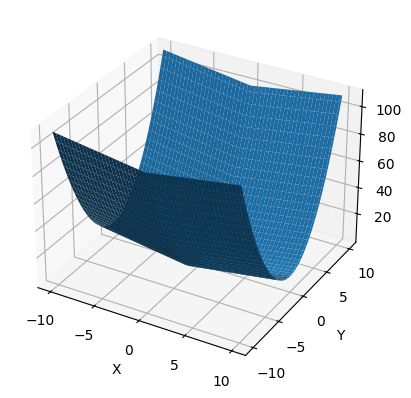

In [51]:



def visualize_fn(f, l=-10, r=10, n=100):
    x = np.linspace(l, r, n)
    y = np.linspace(l, r, n)
    
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    plt.show()


f= lambda x,y : abs(x) + y**2

visualize_fn(f)

dfdx= grad(f)
#print (dfdx(-0.00000001,6))

